In [838]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go
from utilities import *
from tqdm import tqdm

In [839]:
# On specifie a matplotlib que l'on est en dark mode
plt.style.use('dark_background')

# Fonctions Neurone

In [840]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [841]:
def model(X, W, b):
    Z = X.dot(W) + b
    # print(Z.min())
    A = 1 / (1 + np.exp(-Z))
    return A

In [842]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [843]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [844]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [845]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A

In [846]:
def artificial_neuron(X_train, y_train, X_test=None, y_test=None, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    
    
    if X_test is not None and y_test is not None:
        test = True
        test_loss = []
        test_acc = []
    else:
        test = False

    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i %10 == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b) > 0.5
            train_acc.append(accuracy_score(y_train, y_pred))
            
            if test :
                # Test
                A_test = model(X_test, W, b)
                test_loss.append(log_loss(A_test, y_test))
                y_pred = predict(X_test, W, b) > 0.5
                test_acc.append(accuracy_score(y_test, y_pred))

        # mise a jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    if test:
        plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    if test:
        plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return (W, b)

# Initialisation d'un dataset (2D)

In [847]:
# Dataset 2D de sklearn
def dataset1():
    X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
    y = y.reshape((y.shape[0], 1))
    return X,y

# Dataset 2D aléatoire
def dataset2():
    X = np.random.randn(100, 2)
    y = np.zeros((100, 1))
    for i in range(len(X)):
        if X[i, 1] >= 0.5 * X[i, 0] + 0.5:
            y[i] = 1
        else:
            y[i] = 0
    y = y.reshape((y.shape[0], 1))
    return X,y

def affichage(X,y):
    plt.scatter(X[:,0], X[:, 1], c=y)
    # affiche les axes
    plt.axvline(0, c='white', lw=1)
    plt.axhline(0, c='white', lw=1)
    plt.show()
    
def affichage_data(X_train, y_train, X_test, y_test):
    print("Train set :")
    print(X_train.shape)
    print(y_train.shape)
    print(np.unique(y_train, return_counts=True))
    print()
    print("Test set :")
    print(X_test.shape)
    print(y_test.shape)
    print(np.unique(y_test, return_counts=True))

## Entrainement du neurone sur un dataset 2D

100%|██████████| 1000/1000 [00:00<00:00, 38510.24it/s]


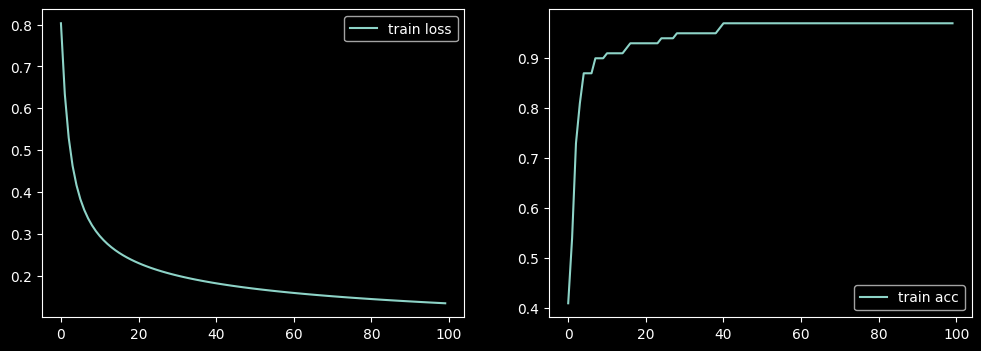

In [848]:
X,y = dataset2()
W,b = artificial_neuron(X, y, learning_rate = 0.1, n_iter = 1000)

# Affichage de la ligne de décision et test avec un nouveau point

[[0.12735569]
 [0.40580945]
 [0.76167986]
 [0.93732922]]


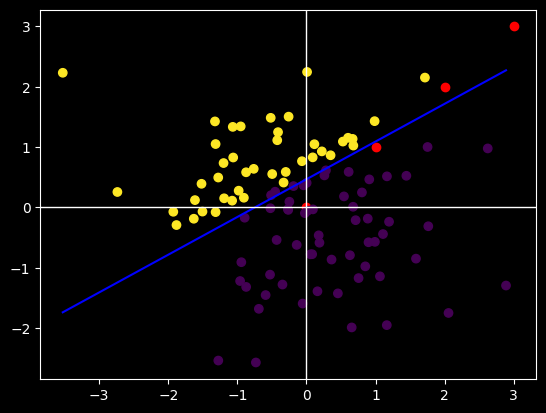

In [849]:
# nouveau point pour tester puis prediction avec le neurone et affichage
newpoint = np.array([[0, 0], [1, 1], [2, 2], [3, 3]])
predictions = predict(newpoint, W, b)
print(predictions)

# ligne pour laquelle le neurone vaut 0.5
x0 = np.array([X[:, 0].min(), X[:, 0].max()])
x1 = - (b + W[0] * x0) / W[1]

# affichage avec la ligne de décision
plt.scatter(newpoint[:,0], newpoint[:, 1], c='red')
plt.plot(x0, x1, c='blue')
affichage(X,y)

# Affichage 3D de la fonction de décision

In [850]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

# Affichage 3D de la fonction de décision avec la ligne de décision

In [851]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()


# Initialisation d'un dataset (images)

In [852]:
def dataset3():
    return load_data()

In [853]:
X_train, y_train, X_test, y_test = dataset3()
def affiche_image (X,y):
    plt.figure(figsize=(16, 8))
    for i in range(1, 10):
        plt.subplot(4, 5, i)
        plt.imshow(X[i], cmap='gray')
        plt.title(y[i])
        plt.tight_layout()
    plt.show()

Train set :
(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))

Test set :
(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


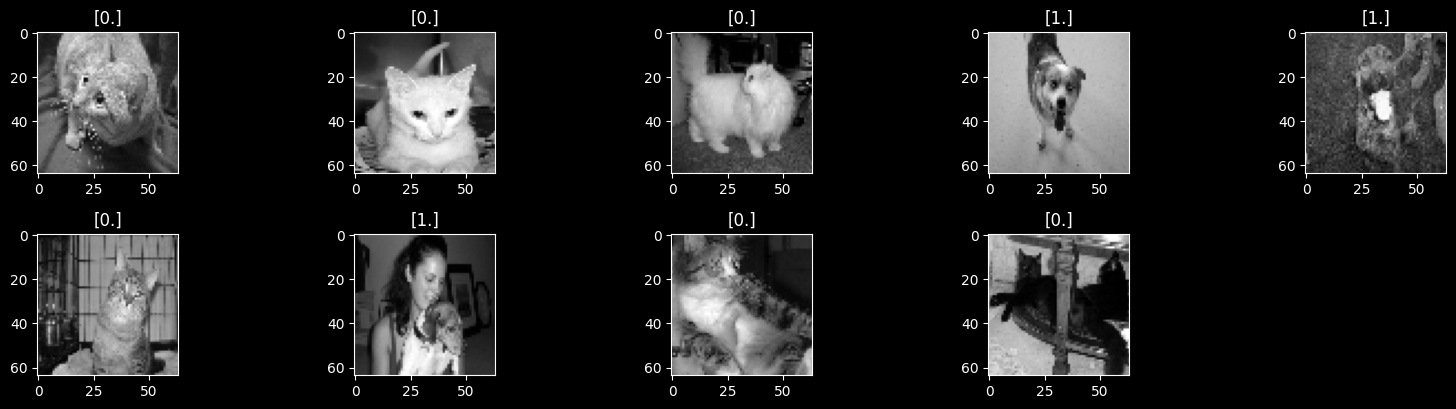

In [854]:
affichage_data(X_train, y_train, X_test, y_test)
affiche_image(X_train,y_train)

In [855]:
# 1. Normaliser le train_set et le test_set (0-255 -> 0-1)
# 2. flatten les images (64x64 -> 4096)
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()

100%|██████████| 10000/10000 [00:39<00:00, 253.58it/s]


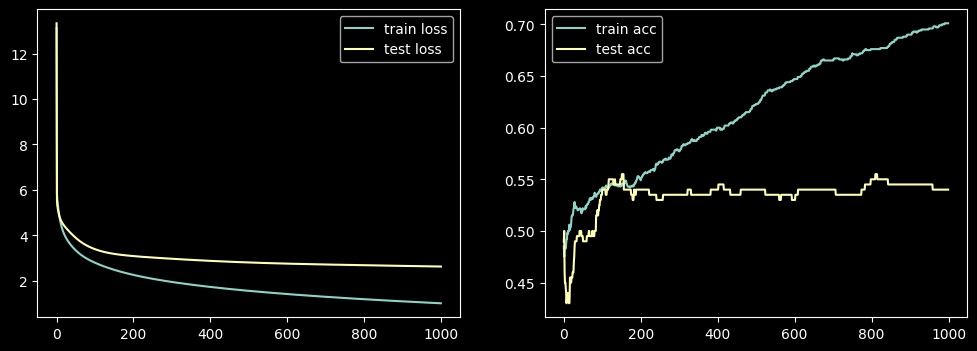

0.54


In [856]:
# 3. Entrainer le modele sur le train_set (tracer la courbe d'apprentissage, trouver les bons hyper-params)
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate = 0.01, n_iter = 10000)
# 4. Évaluer le modele sur le test_set (tracer également la courbe de Loss pour le test_set)
predictions = predict(X_test_reshape,W,b)

# 5. Partager vos conclusions dans les commentaires !
print(accuracy_score(y_test,predictions>0.5))